# Notebook for Testing K-NN on English Letter Dataset

In [1]:
import pandas as pd

from collections import Counter

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

### Loading Predictions. 

In [2]:
filename = 'knn_log_04_02_2024.csv'

df = pd.read_csv(filename, header=None)

y_test = df.iloc[:, 0].tolist()
nn = df_dropped = df.drop(columns=[0, 1])

### Optimizing K value

In [3]:
def most_common_in_row(row):
    counts = Counter(row)
    max_freq = counts.most_common(1)
    return max_freq[0][0] if max_freq else None

In [4]:
precisions = list()
recalls = list()
ks = list()

for i in reversed(nn.columns[1:]):
    nn.drop(columns=[i], inplace=True)
    y_pred = nn.apply(lambda row: most_common_in_row(row), axis=1).tolist()
    
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    precisions.append(precision)
    recalls.append(recall)
    ks.append(i -1)
    
    print("k = ", i - 1)
    print(f"Precision: {precision}")
    print(f"Recall: {recall} \n")

k =  40
Precision: 0.8358523517502012
Recall: 0.8228802959286831 

k =  39
Precision: 0.8373524024469294
Recall: 0.8212112550929755 

k =  38
Precision: 0.84001756337296
Recall: 0.8237753576570782 

k =  37
Precision: 0.8422848793902759
Recall: 0.826630295928683 

k =  36
Precision: 0.8379342300396265
Recall: 0.8216920243237449 

k =  35
Precision: 0.8422117374852925
Recall: 0.8262444934595472 

k =  34
Precision: 0.8449526283080249
Recall: 0.8288085960236499 

k =  33
Precision: 0.8435280090552275
Recall: 0.8258586909904115 

k =  32
Precision: 0.8561256124497949
Recall: 0.8396110651594523 

k =  31
Precision: 0.852342359849338
Recall: 0.8343541953864535 

k =  30
Precision: 0.8541261891331674
Recall: 0.8368233311889226 

k =  29
Precision: 0.852177790817892
Recall: 0.8339683929173176 

k =  28
Precision: 0.8608429276628534
Recall: 0.8385208620531202 

k =  27
Precision: 0.8674708240199855
Recall: 0.8430733311889226 

k =  26
Precision: 0.8616576675295844
Recall: 0.8381350595839844 



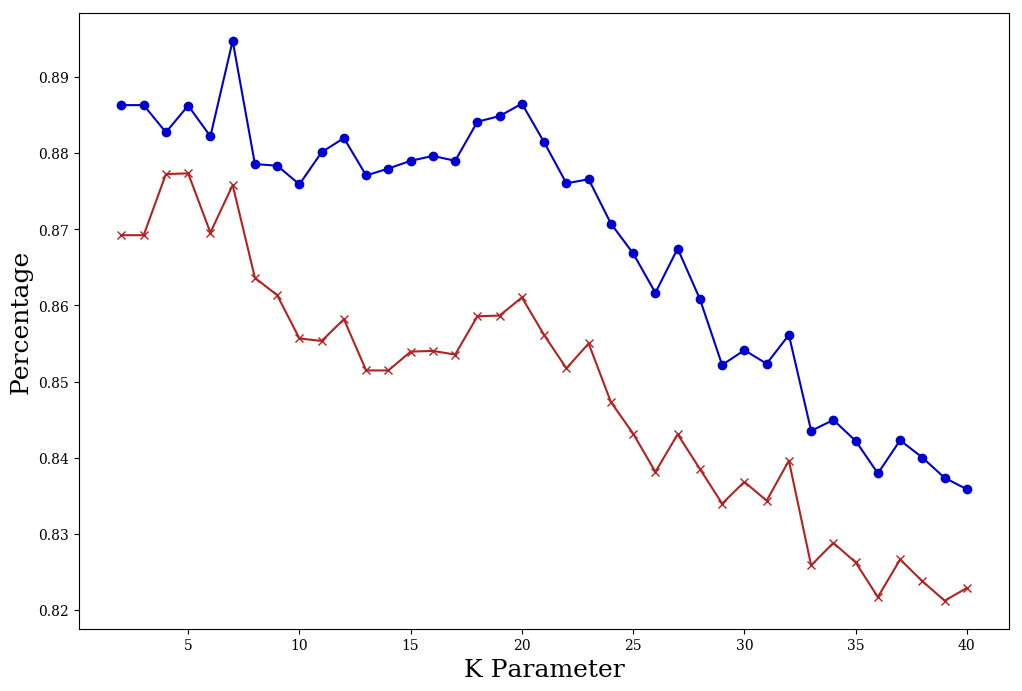

In [5]:
title_fontsize = 22 
axis_fontsize_rect = 18
legend_fontsize = 'large'
plt.rcParams["font.family"] = 'Serif'

plt.figure(figsize=(12, 8))
plt.plot(ks, precisions, label='Precision', marker='o', color='mediumblue')
plt.plot(ks, recalls, label='Recall', marker='x', color='firebrick')

# Adding labels and title
plt.xlabel('K Parameter', fontsize=axis_fontsize_rect)
plt.ylabel('Percentage', fontsize=axis_fontsize_rect )
#plt.title('Precision and Recall | Traversal Distance k-NN', fontsize=title_fontsize)
plt.savefig(f"../images/svgs/precision_recall.svg", format='svg')
